# Neural Network from Scratch

Hey guys, we will be making a neural network to predict which team will win a dota match.

In [1]:
#Magic functions in IPython
#visit https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained for more detail
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

### Importing the libraries and extended function(kept in seperate .py files)
- [Numpy](https://numpy.org/) :- It provides a high-performance multidimensional array object, and tools for working with these arrays.
- [Pandas](https://pandas.pydata.org/) :- It is used for data analysis.
- [Matplotlib](https://matplotlib.org/) :- In is used for vizualization purposes.
- [Math](https://docs.python.org/3/library/math.html) :- Well known library used for performing complex mathematical operations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


from activation import * #it contains all the well known activation function
from propagation import * #it contains forward propagation and backward propagation functions
from cost_function import logistic_loss #it contains loss functions, used to moniter the performance of the neural network
from initialization_of_parameters import * #different initialization methods
from optimizer import * #it contains different optimization functions
from prediction import *

#To generate same random values everytime a random value is generated anywhere
np.random.seed(9)

### Read and Prepare the data
To work on a dataset we need to import it using '.read_csv('location')' with the help of pandas library.

The data is then preprocessed before it is given to a model. Preprocessing is done to improve model accuracy.

In [3]:
df = pd.read_csv('dota2_train.csv') 

### What is the data about?
If you ever played E-Sports games. You might have definitely heard of Dota2.
Dota 2 is a popular computer game with two teams of 5 players. At the start of the game each player chooses a unique hero with different strengths and weaknesses. The dataset is reasonably sparse as only 10 of 113 possible heroes are chosen in a given game. All games were played in a space of 2 hours on the 13th of August, 2016.

### Data description
Each row of the dataset is a single game with the following features (in the order in the vector):
1. Team won the game (1 or -1)
2. Cluster ID (related to location)
3. Game mode (eg All Pick)
4. Game type (eg. Ranked)
5. end: Each element is an indicator for a hero. Value of 1 indicates that a player from team '1' played as that hero and '-1' for the other team. Hero can be selected by only one player each game. This means that each row has five '1' and five '-1' values.

[Click here](https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results#) for more details on the data 

In [4]:
df.head(5) #Checking if the data was correctly import or not

,Cluster_ID,gamemode,gametype,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,...,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden,Results
0,223,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,152,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
2,131,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
3,154,2,2,0,0,0,0,0,0,-1,...,-1,0,0,0,0,0,0,0,0,1
4,171,2,3,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0


### Explaination of the data

Each Column from [3:115] in the Dataframe df represents a hero from dota. Each row from Cluster ID is a match between 2 teams,
and Results is '1' if Team 1 wins and '0' if Team 2 wins.

Lets have a look at an example:-
<img align = 'center' src='dota2_loadingscreen.png'>

The above figure represents a Dota2 match between Team 1 and Team 2 that is about to start, 
- **Every hero in team 1 will have value 1 in the dataframe df.** 
- **Every hero in team 2 will have value -1 in the dataframe.**
- **Rest of the hero columns will be 0.**

This helps us to know that *every column representing a hero is important in deriving which team wins the match, and rest of the columns can be removed*

In [5]:
#Dividing the dataframe df to matrix of features X and independent variable Y
Y = df['Results']  
X = df.drop(['Results'], axis = 1)

In [6]:
# Dropping the unnessary columns to reduce time and space complexity
X = X.drop(['Cluster_ID', 'gamemode', 'gametype'], axis = 1)

In [7]:
X.describe()

,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,mirana,nevermore,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
count,87038.000000,87038.000000,87038.000000,87038.000000,87038.000000,87038.000000,87038.00000,87038.000000,87038.000000,87038.000000,...,87038.000000,87038.000000,87038.000000,87038.000000,87038.000000,87038.0,87038.000000,87038.000000,87038.000000,87038.000000
mean,-0.001344,-0.001046,0.000574,-0.000333,-0.001873,0.002447,0.00008,-0.003734,0.005136,0.001505,...,-0.000632,-0.001068,-0.000850,0.000712,0.000299,0.0,0.001356,0.000908,-0.000057,-0.000023
std,0.401876,0.468389,0.165292,0.355746,0.330146,0.483187,0.34870,0.501978,0.588021,0.325486,...,0.253902,0.534127,0.205901,0.283553,0.156068,0.0,0.220554,0.205370,0.168903,0.190422
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [8]:
#Converting the X to array format, since model cannot operate on dataframe object.
#Applying Transpose on the array i.e. rows becomes columns and vice versa
X = X.values[:,:112]
X = np.transpose(X, axes=None)

In [9]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
Y = Y.to_numpy()
print(Y)

[0 1 1 ... 1 1 0]


## Steps to create a Neural Network from Scratch
- Intialization
- Forward Propagation
- Cost Computation
- Backward Propagation
- Optimization or Update Parameters

### Initialization

We have to intialize parameters like **Weights and Bias** which model will use to learn and update parameters. There are different ways to initialize these parameters. Each ways work well in specific situations.

| Zero Initialization | Random Initialization |   
| :------------------------ | :--------------------------- |
| <img align = 'left' src = 'zero_init.png'> | <img align = 'left' src = 'random_init.png'> |
| Weights have same value in subsequent iterations and hence never used in practice | Work better than Zero initialization but can cause vanishing and exploding gradient problem | 


| He Initialization | Xavier Initialization |
| :------------------------ | :---------------------------- |
| <img align = 'left' src = 'he_init.png'> | <img align = 'left' src = 'xavier_init.png'> |
|  Best when used with ReLU activation, does not cause vanishing and exploding gradient problem | Similar to He intialization but best when used with TanH activation |


### Forward Propagation

The network propagates forward calculating the weighted sum of inputs and then applying no linear activation till it reaches the output layer.
<p align='center'>
    <img src='forward_prop.png'>
</p>

There exists lot of activation function, some of the most used activation functions are given below.
<p align='center'>
    <img src='activation_functions.png' height = '500' width='500'>
</p>
<div style="text-align: right">Source[image]:- https://medium.com/@shrutijadon10104776/survey-on-activation-functions-for-deep-learning-9689331ba092 </div>

### Cost Computation

The output of the neural network is the predicted value for 1 example after first iteration, this value is then compared with the actual value to find the difference between the two, lesser the difference, more accurate the predicted value. There are different cost functions suitable for different situations. They are given below:-
<p align='center'>
    <img src='Cost_function.png' width="400" height="400"/>
</p>


### Back Propagation

To reduce the cost, predicted value is back propagated to calculate the derivates using the chain rule to update the parameters of the network
<p align='center'>
    <img src='back_prop.png' width="400" height="400"/>
</p>

### Optimization or Update Parameters

We now use the derivative values calculated in back propagation to update the parameters of the neural network, there are different methods to do so as well. lets have a look at them.

| Batch Gradient Descent | Momentum |   
| :------------------------ | :--------------------------- |
| <img src = 'Batch_gradient_descent.png' width='300' height='300' /> | <img src = 'momentum.png' width='300' height='300' /> |



| RMSProp | Adam |
| :------------------------ | :---------------------------- |
| <img src = 'rmsprop.png' width='300' height='300' /> | <img src = 'adam.png' width='300' height='300' /> |



In [11]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.05, num_epochs = 2000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
                       
    
    # Initialize parameters
    parameters = he_init(layers_dims)

    # Initialize the optimizer
    '''
    if optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    '''
    # Optimization loop
    for i in range(num_epochs):
    
        # Forward propagation
        a3, caches = forward_propagation(X, parameters)

        # Compute cost
        cost = logistic_loss(a3,Y)

        # Backward propagation
        grads = backward_propagation(X,Y, caches)

        # Update parameters
        if optimizer == "gd":
            parameters = GD(parameters, grads, learning_rate)
        
        '''
        elif optimizer == "momentum":
            parameters, v = momentum(parameters, grads, v, beta, learning_rate)
        elif optimizer == "adam":
            t = t + 1 # Adam counter
            parameters, v, s = adam(parameters, grads, v, s, t, learning_rate, beta1, beta2,  epsilon)
        '''
        # Print the cost every 1000 epoch
        if print_cost and i % 100 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Cost after epoch 0: 0.751501
Cost after epoch 100: 0.698124
Cost after epoch 200: 0.688709
Cost after epoch 300: 0.684304
Cost after epoch 400: 0.681504
Cost after epoch 500: 0.679437
Cost after epoch 600: 0.677772
Cost after epoch 700: 0.676357
Cost after epoch 800: 0.675117
Cost after epoch 900: 0.674011
Cost after epoch 1000: 0.673013
Cost after epoch 1100: 0.672104
Cost after epoch 1200: 0.671276
Cost after epoch 1300: 0.670519
Cost after epoch 1400: 0.669828
Cost after epoch 1500: 0.669197
Cost after epoch 1600: 0.668620
Cost after epoch 1700: 0.668095
Cost after epoch 1800: 0.667615
Cost after epoch 1900: 0.667179


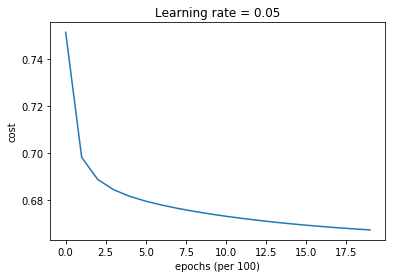

In [12]:
layers_dims = [X.shape[0], 100, 100, 1]
parameters = model(X, Y, layers_dims, optimizer = "gd")

## Prediction

A forward propagation is run on the data the neural network has never seen before, and its calculate its performance the predicted value on unseen data is compared with the actual value of unseen data.

In [13]:
df_test = pd.read_csv('dota2_test1.csv')
Y_test = df_test['Results']  
X_test = df_test.drop(['Results'], axis = 1)

In [14]:
X_test = X_test.drop(['Cluster_ID', 'gamemode', 'gametype'], axis = 1)

In [15]:
X_test = X_test.values[:,:112]
X_test = np.transpose(X_test, axes=None)

In [16]:
Y_test = Y_test.to_numpy()

In [17]:
# Predict
predictions = predict(X_test, Y_test, parameters)

Accuracy: 0.5981824661439772


#### Accuracy

Since the neural network has lot of input nodes(112 to be precise) and we have only provided 2 hidden layers with 100 nodes each, the neural network does not have room to play with more parameters, the accuracy of the model is affected, if we increase the number of layers and nodes in those layers it can result in high accuracy.

| Accuracy:- | 59.81%|
|------------|-------|